In [1]:
# Checkout www.pygimli.org for more examples
%matplotlib inline


# Heat equation in 2D

This tutorial simulates the stationary heat equation in 2D. The example is
taken from the pyGIMLi paper (https://cg17.pygimli.org).


In [2]:
import pygimli as pg
import pygimli.meshtools as mt

Create geometry definition for the modelling domain.



(<AxesSubplot:>, None)

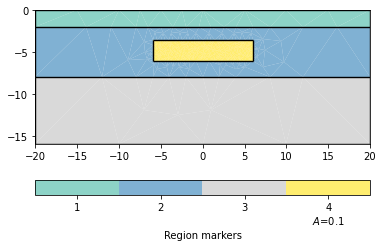

In [3]:
world = mt.createWorld(start=[-20, 0], end=[20, -16], layers=[-2, -8],
                       worldMarker=False)
# Create a heterogeneous block
block = mt.createRectangle(start=[-6, -3.5], end=[6, -6.0],
                           marker=4,  boundaryMarker=10, area=0.1)
# Merge geometrical entities
geom = world + block
pg.show(geom, boundaryMarker=True)

Create a mesh from based on the geometry definition. The quality of the mesh 
When calling the :func:`pg.meshtools.createMesh` function, a quality parameter
can be forwarded to Triangle, which prescribes the minimum angle allowed in
the final mesh. For a tutorial on the quality of the mesh please refer to : 
Mesh quality inspection [1]
[1]: https://www.pygimli.org/_tutorials_auto/1_basics/plot_6-mesh-quality-inspection.html#sphx-glr-tutorials-auto-1-basics-plot-6-mesh-quality-inspection-py
Note: Incrementing quality increases computer time, take precaution with quality 
values over 33.



(<AxesSubplot:>, None)

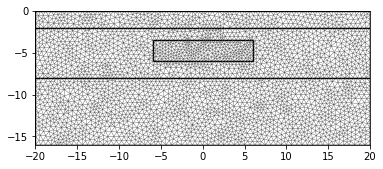

In [4]:
mesh = mt.createMesh(geom, quality=33, area=0.2, smooth=[1, 10])
pg.show(mesh)

Call :py:func:`pygimli.solver.solveFiniteElements` to solve the heat
diffusion equation $\nabla\cdot(a\nabla T)=0$ with $T(bottom)=1$
and $T(top)=0$, where $a$ is the thermal diffusivity and $T$
is the temperature distribution. We assign thermal diffusivities to the four regions
using their marker number in a dictionary (a) and the fixed temperatures at the 
boundaries using Dirichlet boundary conditions with the respective markers in 
another dictionary (bc) 



Mesh:  Mesh: Nodes: 3011 Cells: 5832 Boundaries: 8842
Assembling time:  0.064
Solving time:  0.139


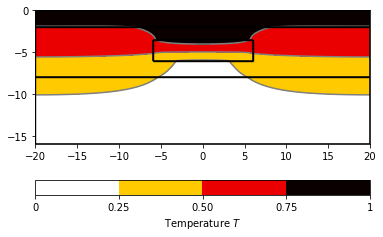

In [5]:
T = pg.solver.solveFiniteElements(mesh,
                                  a={1: 1.0, 2: 2.0, 3: 3.0, 4:0.1},
                                  bc={'Dirichlet': {8: 1.0, 4: 0.0}}, verbose=True)

ax, _ = pg.show(mesh, data=T, label='Temperature $T$', cMap="hot_r")
pg.show(geom, ax=ax, fillRegion=False)

# just hold figure windows open if run outside from spyder, ipython or similar
pg.wait()